<a href="https://colab.research.google.com/github/Enespc/uygulamalar-yapayzeka/blob/main/uygulamalar_yapay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#uygulama1

In [129]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [130]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [132]:
pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC())])
pipe.fit(X_train, y_train)
Pipeline(steps = [("scaler", StandardScaler()), ("svc", SVC())])

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [133]:
pipe.score(X_test, y_test)

0.88

In [ ]:
#uygulama2

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
pd.DataFrame (data = diabetes_X).info()
diabetes_X = diabetes_X[:, np.newaxis, 2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [122]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

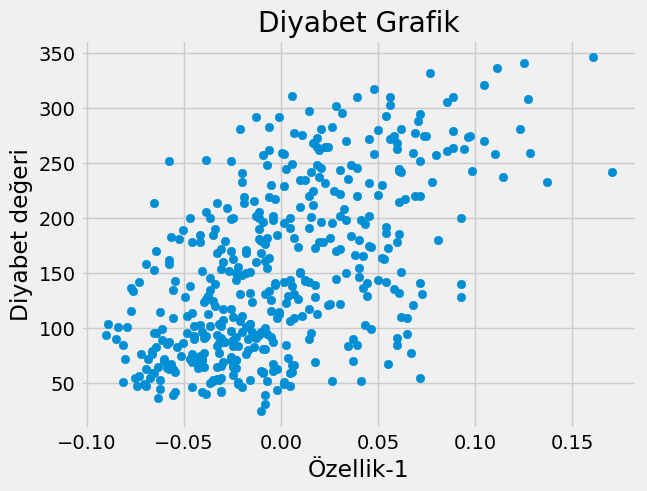

In [123]:
plt.scatter(diabetes_X, diabetes_y)
plt.title("Diyabet Grafik")
plt.xlabel("Özellik-1")
plt.ylabel("Diyabet değeri")
plt.grid(True)
plt.show()

In [124]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [125]:
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [126]:
print('Sabit (bias): \n', regr.intercept_)
print('Katsayı: \n', regr.coef_)

Sabit (bias): 
 152.91886182616113
Katsayı: 
 [938.23786125]


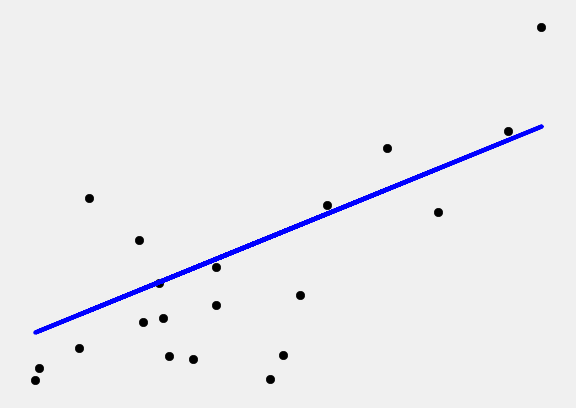

In [127]:
plt.scatter(diabetes_X_test, diabetes_y_test, color = "black")
plt.plot(diabetes_X_test, diabetes_y_pred, color = "blue",
linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

In [128]:
print("Ortalama Kare Hata: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("R Kare: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Ortalama Kare Hata: 2548.07
R Kare: 0.47


In [ ]:
#uygulama3

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [ ]:
data = pd.read_csv('/content/sample_data/homeprices.csv')
data.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
data.rename(columns = {'area':'alan', 'bedrooms':'oda_sayisi', 'age':'yasi', 'price':'fiyati'}, inplace = True)
data.head()

,alan,oda_sayisi,yasi,fiyati
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
data.info()
median_oda_sayisi = data['oda_sayisi'].median()
median_oda_sayisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   alan        6 non-null      int64  
 1   oda_sayisi  5 non-null      float64
 2   yasi        6 non-null      int64  
 3   fiyati      6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


4.0

In [ ]:
median_oda_sayisi = data['oda_sayisi'].median()
median_oda_sayisi
data.oda_sayisi = data.oda_sayisi.fillna(median_oda_sayisi)
data

,alan,oda_sayisi,yasi,fiyati
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(data[['alan', 'oda_sayisi', 'yasi']], data.fiyati)

LinearRegression()

In [ ]:
reg_pred = reg.predict(data[['alan', 'oda_sayisi', 'yasi']])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Ortalama Kare Hata: %.2f" % mean_squared_error(data.fiyati, reg_pred))
print("R Kare: %.2f" % r2_score(data.fiyati, reg_pred))

Ortalama Kare Hata: 446305128.22
R Kare: 0.96


In [ ]:
  reg.predict([[3000,3,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
#uygulama4

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns
plt.style.use('fivethirtyeight')
# Uyarılar kapatılır.
import warnings
warnings.filterwarnings('ignore')
# Performans değerlendirme metrikleri.
from sklearn.metrics import r2_score # r kare

In [ ]:
df = pd.read_csv("/content/sample_data/position_salaries.csv")
# Veri seti yazdırılır.
print (df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
df.columns = ['pozisyon', 'pozisyon_seviyesi','maas']
# Yeni sütun adları ile veri seti tekrar görüntülenir.
df.head()

,pozisyon,pozisyon_seviyesi,maas
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = df.iloc[:,1:2].values
# maas bağımlı değişken olarak belirlenir.
y = df.iloc[:,2].values

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
poly_reg2 = PolynomialFeatures(degree = 2)
# Polinom derecesi 2 olarak belirlenir.
X_poly = poly_reg2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [ ]:
poly_reg3 = PolynomialFeatures(degree=3)
# Polinom derecesi 3 olarak belirlenir.
X_poly3 = poly_reg3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

In [ ]:
y_tahmin_lineer = lin_reg.predict(X)
y_tahmin_poly2 = lin_reg_2.predict(poly_reg2.fit_transform(X))
y_tahmin_poly3 = lin_reg_3.predict(poly_reg3.fit_transform(X))

In [ ]:
print("Doğrusal Regresyon R Kare Değeri: %.2f" % r2_score(y,y_tahmin_lineer))
print("İkinci derece polinomsal regresyon R kare değeri: %.2f" % r2_score(y,y_tahmin_poly2))
print("Üçüncü derece polinomsal regresyon R Kare değeri: %.2f" % r2_score(y,y_tahmin_poly3))

Doğrusal Regresyon R Kare Değeri: 0.67
İkinci derece polinomsal regresyon R kare değeri: 0.92
Üçüncü derece polinomsal regresyon R Kare değeri: 0.98


In [ ]:
print("Lineer Regresyon Tahmini: ", lin_reg.predict([[6.5]]))
print("İkinci Derece Pol.Regresyon Tahmini: ",lin_reg_2.predict(poly_reg2.fit_transform([[6.5]])))
print("İkinci Derece Pol. Tahmini: ", lin_reg_3.predict(poly_reg3.fit_transform([[6.5]])))

Lineer Regresyon Tahmini:  [330378.78787879]
İkinci Derece Pol.Regresyon Tahmini:  [189498.10606061]
İkinci Derece Pol. Tahmini:  [133259.46969697]


In [ ]:
#uygulama5

In [38]:
import numpy as np
import pandas as pd

In [39]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algoritmalar.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Model performans değerlendirme metrikleri.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from random import randrange
import warnings # Uyarılar kapatılır.
warnings.filterwarnings("ignore")

In [40]:
diyabet_df= pd.read_csv("/content/sample_data/diabetes.csv")
diyabet_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
diyabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
X = diyabet_df[['gebelik', 'glikoz', 'kan_basinci', 'cilt_kalinligi', 'insulin', 'vki', 'diyabet_fonk','yas' ]] # bağımsız değişkenler.
y = diyabet_df[['sonuc']] # bağımlı değişken.
# Veri seti eğitim ve test olarak ayrılır.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
# Veri setinde sadece değerler alınır.
diyabet_df = diyabet_df.values
diyabet_df

KeyError: "None of [Index(['gebelik', 'glikoz', 'kan_basinci', 'cilt_kalinligi', 'insulin', 'vki',\n       'diyabet_fonk', 'yas'],\n      dtype='object')] are in the [columns]"

In [ ]:
#uygulama6

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Veri setindeki sütunların adları belirlenir.
sutunlar = ['sepal_uzunluk', 'sepal_genislik', 'petal_uzunluk','petal_genislik', 'sinif']
# Veri dosyası yüklenir.
iris_df = pd.read_csv(url, names = sutunlar)
# Veri seti kontrol edilir.
iris_df.head()

,sepal_uzunluk,sepal_genislik,petal_uzunluk,petal_genislik,sinif
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_uzunluk   150 non-null    float64
 1   sepal_genislik  150 non-null    float64
 2   petal_uzunluk   150 non-null    float64
 3   petal_genislik  150 non-null    float64
 4   sinif           150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, 4].values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 60)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
y_pred = classifier.predict(X_test)
print (y_pred) # Tahminler yazdırılır.

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 10  0]
 [ 0  2  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.71      0.83         7

       accuracy                           0.93        30
      macro avg       0.94      0.90      0.91        30
   weighted avg       0.94      0.93      0.93        30

